# Machine Learning Model for Hate Speech Detection

Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
import nltk
import re 
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer('english')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\HI/nltk_data'
    - 'c:\\Users\\HI\\anaconda3\\nltk_data'
    - 'c:\\Users\\HI\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\HI\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\HI\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Read the data and see the beginning part

In [ ]:
data_df = pd.read_csv('train.csv')
print(data_df.head())

   count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


Change the column headers

In [ ]:
data_df['labels'] = data_df['class'].map({0:'Hate Speech', 1:'Offensive Speech',2:'No Hate No Offense'})
data_df = data_df[['tweet','labels']]

In [ ]:
data_df.describe()

,tweet,labels
count,24783,24783
unique,24783,3
top,!!! RT @mayasolovely: As a woman you shouldn't...,Offensive Speech
freq,1,19190


In [ ]:
data_df['labels'].unique()

array(['No Hate No Offense', 'Offensive Speech', 'Hate Speech'],
      dtype=object)

<Axes: xlabel='labels', ylabel='count'>

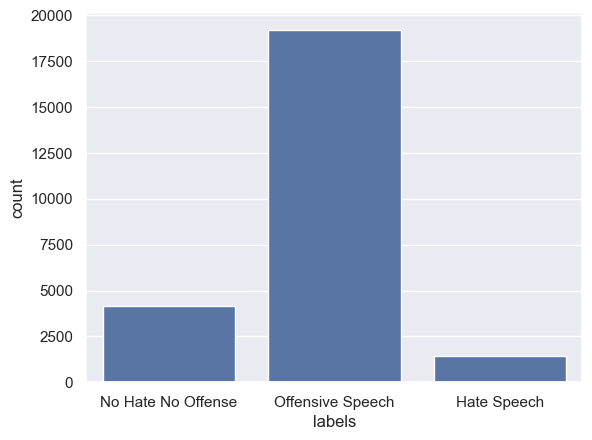

In [ ]:
import seaborn as sns
sns.set_theme()
sns.countplot(data_df, x ='labels')


In [ ]:
data_df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate No Offense
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech


In [ ]:
data_df.tail()

,tweet,labels
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Speech
24779,"you've gone and broke the wrong heart baby, an...",No Hate No Offense
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Speech
24781,youu got wild bitches tellin you lies,Offensive Speech
24782,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,No Hate No Offense


Preprocessing

In [ ]:
def clean_tweet(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    
    #text = re.sub(r"[^A-Za-z0-9]+", "", text)

    # Load stopwords (replace 'english' with your desired language)
    stop_words = set(stopwords.words('english'))

    # Filter out stopwords (assuming text is tokenized)
    text = [word for word in text.split() if word not in stop_words]

    # Import and use a stemmer (replace PorterStemmer with your preferred stemmer)
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]

    return ' '.join(text)
https://github.com/cabdonad/Hate-Speech-Detection.git




In [ ]:

data_df['tweet'] = data_df['tweet'].apply(clean_tweet)
print(data_df.head())  

                                               tweet              labels
0  rt mayasolov woman shouldnt complain clean hou...  No Hate No Offense
1  rt mleew17 boy dat coldtyga dwn bad cuffin dat...    Offensive Speech
2  rt urkindofbrand dawg rt 80sbaby4lif ever fuck...    Offensive Speech
3          rt c_g_anderson viva_bas look like tranni    Offensive Speech
4  rt shenikarobert shit hear might true might fa...    Offensive Speech


In [ ]:
data_df.tail()

,tweet,labels
24778,you muthafin lie 8220lifeask 20_pearl corey_em...,Offensive Speech
24779,youv gone broke wrong heart babi drove redneck...,No Hate No Offense
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Speech
24781,youu got wild bitch tellin lie,Offensive Speech
24782,ruffl ntac eileen dahlia beauti color combin p...,No Hate No Offense


Create a numpy array from the tweets and labels

In [ ]:
x = np.array(data_df['tweet'])
y = np.array(data_df['labels'])

Tokenize: convert the tweets into a matrix of token counts

In [ ]:
cv = CountVectorizer()

fit it to the text data

In [ ]:
x =cv.fit_transform(x)

Split the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Initilize the algorithm

In [ ]:
model = DecisionTreeClassifier()

Fit in the dataset

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

predict with the test data

In [ ]:
y_pred = model.predict(x_test)

Check the accuracy of the model

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8716224477319966


Try predicting any other text

In [ ]:
i = 'I love you'
i = cv.transform([i]).toarray()
print(model.predict((i)))

['No Hate No Offense']
